<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [579]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook 
# rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't 
# have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [580]:
sat_filepath = '/Users/Cecilia/Desktop/DSI-SF-2-clambeer/datasets/state_sat_scores/sat_scores.csv'
with open(sat_filepath, 'r') as f:
    reader = csv.reader(f)
    header_list = []
    data_list = []
    for index, line in enumerate(reader):
        if index==0:
            header_list = line
        else:
            data_list.append(line)

# print header_list
# print '\n',data_list

data_dict = { 
    header :
    [ 
    int(row[header_row])
    if row[header_row].isdigit()
    else row[header_row]
        
    for row in data_list
    ]
    for header_row, header in enumerate(header_list)
}

print data_dict
# testing reader vs. file.read        
# with open(sat_filepath, 'r') as f:
#     read_reader = f.read()
#     print read_reader
# readlines does the same as read but it splits the lines

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [581]:
# creating a dataframe from the data_dict sat dictionary created above
df_dict = pd.DataFrame(data_dict)
print df_dict

    Math  Rate State  Verbal
0    510    82    CT     509
1    513    81    NJ     499
2    515    79    MA     511
3    505    77    NY     495
4    516    72    NH     520
5    499    71    RI     501
6    499    71    PA     500
7    506    69    VT     511
8    500    69    ME     506
9    501    68    VA     510
10   499    67    DE     501
11   510    65    MD     508
12   499    65    NC     493
13   489    63    GA     491
14   501    60    IN     499
15   488    57    SC     486
16   474    56    DC     482
17   526    55    OR     526
18   499    54    FL     498
19   527    53    WA     527
20   499    53    TX     493
21   515    52    HI     485
22   510    51    AK     514
23   517    51    CA     498
24   525    34    AZ     523
25   515    33    NV     509
26   542    31    CO     539
27   439    26    OH     534
28   539    23    MT     539
29   512    18    WV     527
30   542    17    ID     543
31   553    13    TN     562
32   542    13    NM     551
33   589    12

In [582]:
# creating a dataframe through read_csv:
df = pd.read_csv(sat_filepath)
print df.dtypes
print type(df)
print df
# going through csv/dictionary:
# - takes longer.
# - the order changes because dictionaries don't have order
# - all items end up as strings unless you convert them
#
# going through dataframe:
# - is a lot easier
# - ends up in series / dataframe format
# - pandas tries to figure out what types the objects are, so 
#   rate, verbal, and math end up as int64s.

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV  

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [583]:
df.head(10)

# this looks like the average SAT score by state, with a rate. Rate seems to be 
# something like rate_that_students_take_the_test or something similar. DC 
# is included as a state, and there is a row "All".


df.tail()
print df.describe()
df.columns
df.State.value_counts()
# 50 states, plus "All" and "DC"

df.info()

            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [584]:
# data_dictionary = {
#     'State' : {
#         'Type' : 'object',
#         'Description' : 
#     }
# }
""" 
State 
Type: Object
Description: This is the state. You can also include DC and have a line for All.

Math
Type: Int64
Description: Average SAT Math score for the state

Verbal
Type: Int64
Description: Average SAT Verbal score for the state

Rate
Type: Int64
Description: Percent of high-school juniors that take the SAT 

Shape of the dataset:
52 rows, 4 columns
"""

' \nState \nType: Object\nDescription: This is the state. You can also include DC and have a line for All.\n\nMath\nType: Int64\nDescription: Average SAT Math score for the state\n\nVerbal\nType: Int64\nDescription: Average SAT Verbal score for the state\n\nRate\nType: Int64\nDescription: Percent of high-school juniors that take the SAT \n\nShape of the dataset:\n52 rows, 4 columns\n'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

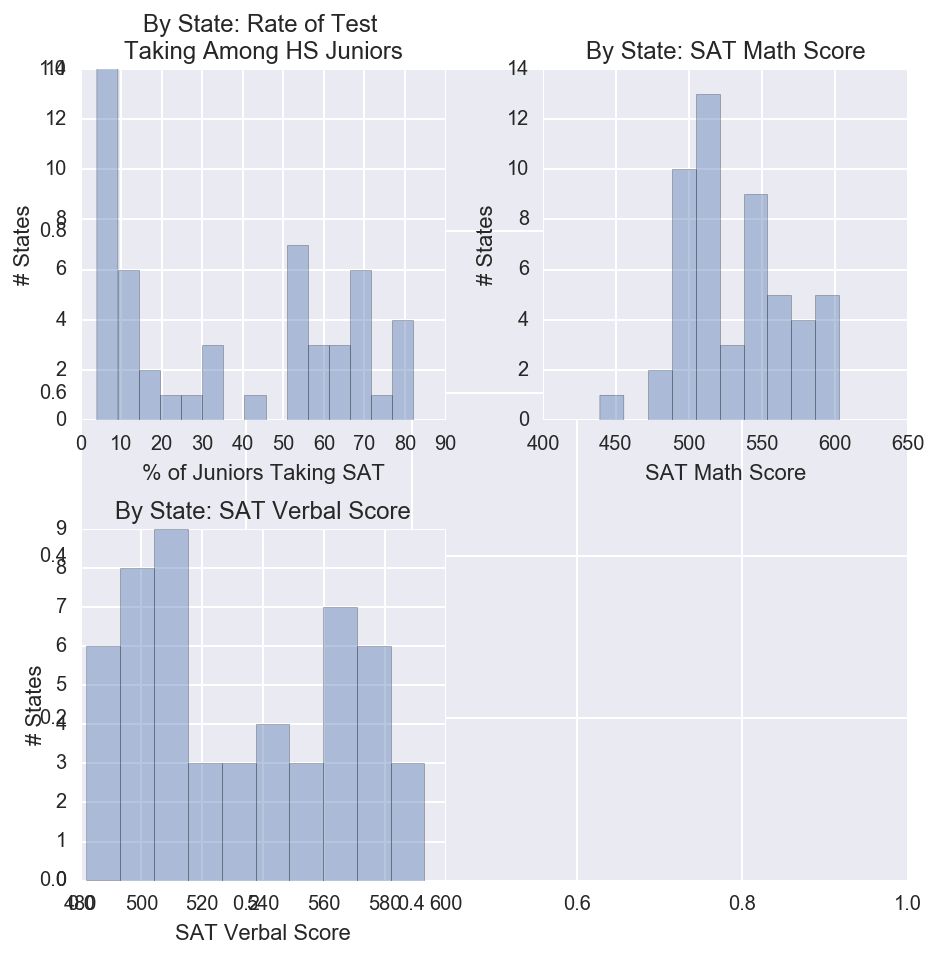

In [585]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

# Rate
ax1 = fig.add_subplot(221)
ax1 = sns.distplot(df.Rate,kde=False, bins=15)
ax1.set_ylabel('# States')
ax1.set_xlabel('% of Juniors Taking SAT')
ax1.set_title('By State: Rate of Test \nTaking Among HS Juniors')

ax2 = fig.add_subplot(222)
ax2 = sns.distplot(df.Math,kde=False, bins = 10)
ax2.set_ylabel('# States')
ax2.set_xlabel('SAT Math Score')
ax2.set_title('By State: SAT Math Score')

ax3 = fig.add_subplot(223)
ax2 = sns.distplot(df.Verbal,kde=False, bins = 10)
ax2.set_ylabel('# States')
ax2.set_xlabel('SAT Verbal Score')
ax2.set_title('By State: SAT Verbal Score')

plt.tight_layout()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

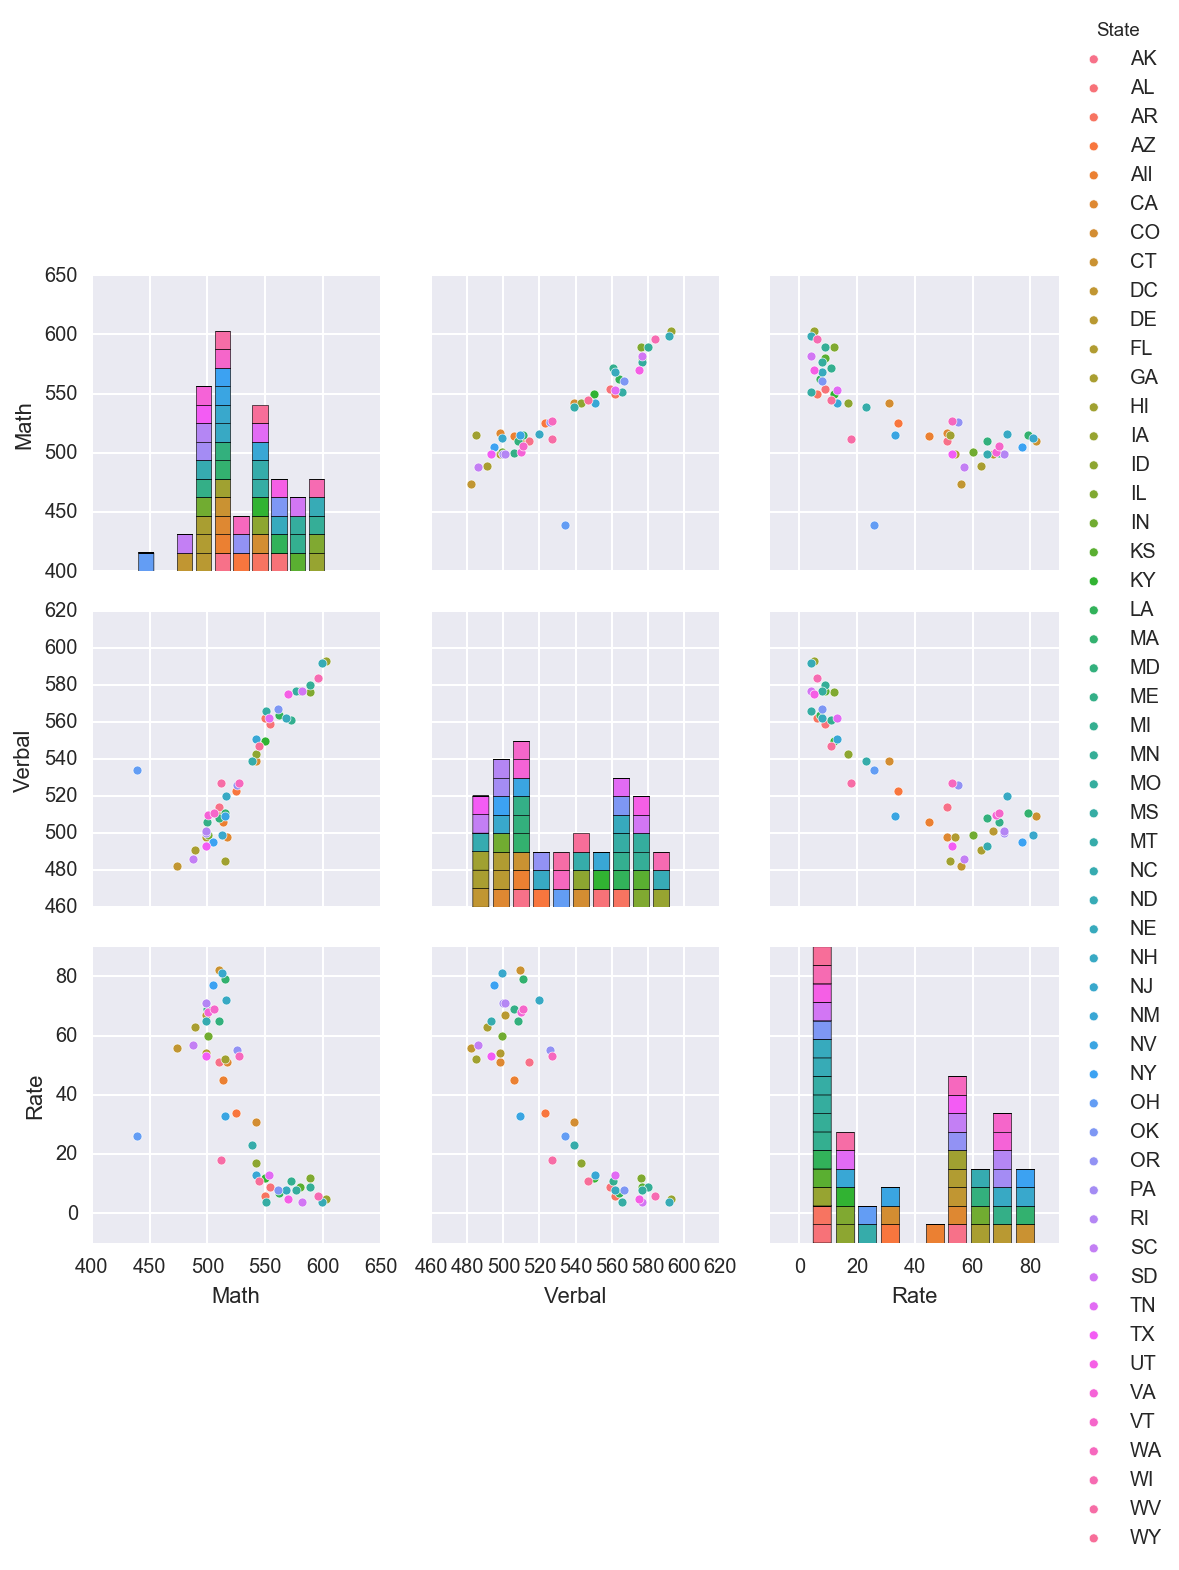

In [586]:
fig = plt.figure()

sns.pairplot(df, vars=['Math','Verbal','Rate'], hue='State', hue_order=df.State.sort_values(ascending=True))

##########################################
# go back over this and think about what #
# this tells you about the data          #
##########################################

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

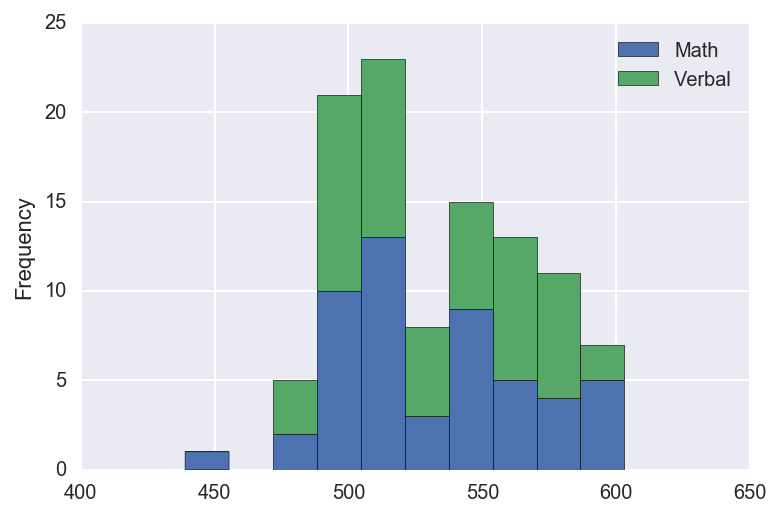

In [587]:
df_subset = df[['Math','Verbal']]
fig = plt.figure()
df_subset.plot(kind='hist', stacked=True)

########################################
# come back to this and try to make    #
# histograms with every variation in   #
# the above documentation              #
########################################

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

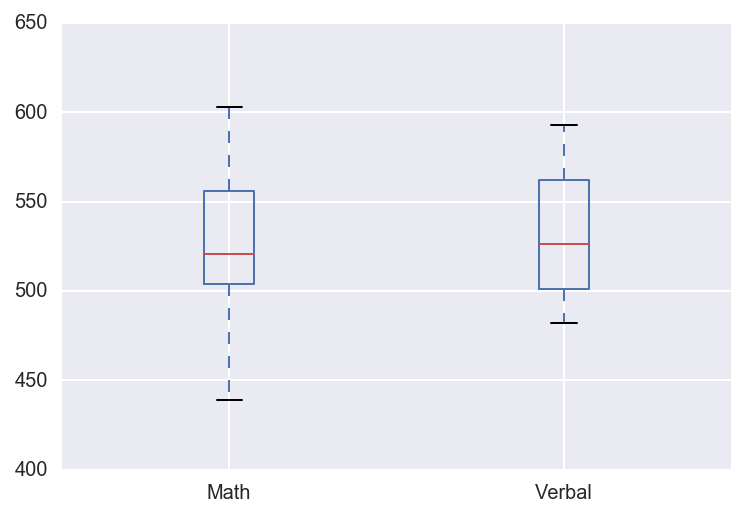

In [588]:
df_subset.plot.box()

########################################
# come back to this and try to make    #
# histograms with every variation in   #
# the above documentation              #
########################################

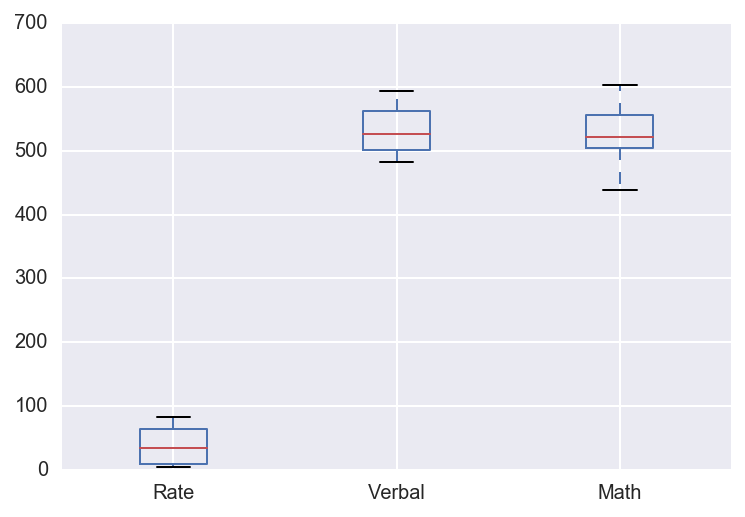

In [589]:
df.plot.box()
# in order to show "Rate", the scale for Verbal and Math has stretched so much
# that they are not useful

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [590]:
####################
# this one is a "B"#
####################

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [591]:
# States where Verbal scores > avg Verbal scores for all states
avg_verbal_score = df['Verbal'].mean()
# print avg_verbal_score

condition = df['Verbal'] > avg_verbal_score
# print condition

# here is the list of states with verbal scores higher than the average
print df[condition]

print df[condition].count()

# there are 24 states above the mean. That means the median is lower than the mean.  
# that means the data skews to the right

   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
State     24
Rate      24
Verbal    24
Math      24
dtype: int64


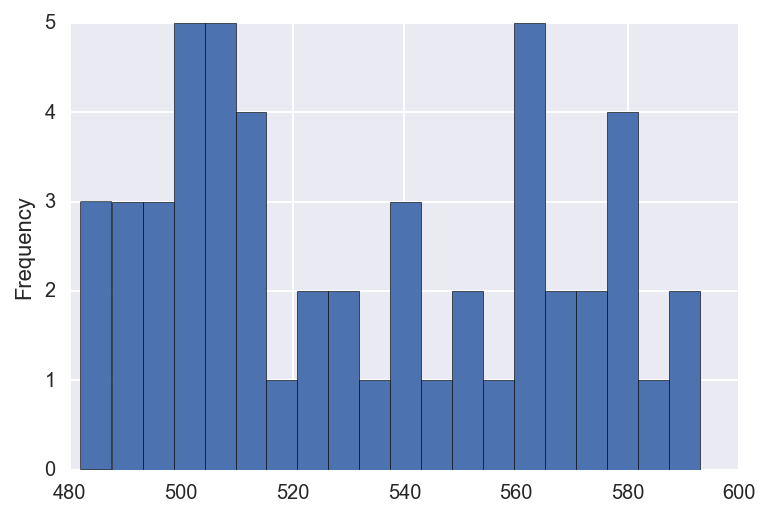

In [592]:
fig = plt.figure()
ax = fig.gca()
df['Verbal'].plot.hist(bins=20)


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [593]:
# States where Verbal scores > median Verbal scores for all states
median_verbal_score = df['Verbal'].median()
print median_verbal_score

condition = df['Verbal'] > median_verbal_score
# print condition

# here is the list of states with verbal scores higher than the median
print df[condition]

print df[condition].count()

# there are 26 states above the median, which should be obvious as there are 
# 52 entries under State. (There's "DC" and also "all".) There are more states
# above the median than there are states above the mean.  Again this reflects
# that the data skews right.

526.5
   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
State     26
Rate      26
Verbal    26
Math      26
dtype: int64


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [594]:
df['Verbal - Math'] = df['Verbal'] - df['Math']
print df.head(20)

   State  Rate  Verbal  Math  Verbal - Math
0     CT    82     509   510             -1
1     NJ    81     499   513            -14
2     MA    79     511   515             -4
3     NY    77     495   505            -10
4     NH    72     520   516              4
5     RI    71     501   499              2
6     PA    71     500   499              1
7     VT    69     511   506              5
8     ME    69     506   500              6
9     VA    68     510   501              9
10    DE    67     501   499              2
11    MD    65     508   510             -2
12    NC    65     493   499             -6
13    GA    63     491   489              2
14    IN    60     499   501             -2
15    SC    57     486   488             -2
16    DC    56     482   474              8
17    OR    55     526   526              0
18    FL    54     498   499             -1
19    WA    53     527   527              0


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [595]:
# Top ten states where Verbal > Math
df_states_verbal_over_math = df.sort_values('Verbal - Math',ascending=False)[0:10]
print df_states_verbal_over_math.head(3)

# Top ten states where Math > Verbal
df_states_math_over_verbal = df.sort_values('Verbal - Math',ascending=False)[-10:]
print df_states_math_over_verbal.sort_values('Verbal - Math', ascending=True).head(3)

   State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
50    MS     4     566   551             15
29    WV    18     527   512             15
   State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [596]:
df_no_state_condition = [col for col in df.columns.values if col not in ['State']  ]
print df_no_state_condition
df[df_no_state_condition].corr()

# 1. Math and Verbal scores are highly positively correlated.
# 2. Rate is highly negatively correlated with both Math and Verbal scores.
# 3. The difference in Verbal and Math scores doesn't seem to be correlated with 
#    anything except, to some extent, Math scores. That makes it seem like it's 
#    not a movement in the Verbal scores that influences the difference in 
#    Verbal and Math scores, but rather a movement in Math scores that 
#    influences in the difference.


['Rate', 'Verbal', 'Math', 'Verbal - Math']


,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [597]:
df.describe().T

# Rate:
# This shows there are 52 rows with an average of 37 and a standard
# deviation of 27. The min and max are shown as well as the quartiles.
# The 50% is also the median so you can see skew by comparin mean
# and median

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
Verbal - Math,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [598]:
####################
# this is B        #
####################

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [599]:
drug_data_filepath = '/Users/Cecilia/Desktop/DSI-SF-2-clambeer/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

In [600]:
print drug.head()
print drug.tail()

  age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                4

In [601]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [602]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


In [603]:
drug['n'].value_counts()

2271    1
2956    1
4707    1
2628    1
2757    1
2792    1
2354    1
7391    1
2798    1
3038    1
2223    1
2864    1
3058    1
3923    1
4591    1
2448    1
2469    1
Name: n, dtype: int64

In [604]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [605]:
# I was trying to create a simple for loop to print out value_counts
# for every column but for some reason I get this error: 
# 'bound method Series.value_counts of 0'
# Here is info on it: https://github.com/pydata/pandas/issues/8559
# but I can't quite figure out what that means. I tried to resolve 
# the issue of switching back and forth between different dtypes
# but that didn't seem to fix it.

for col in drug.columns.values[1:2]:
    print col, drug[col].dtypes
    if (drug[col].dtypes == 'float64') | (drug[col].dtypes == 'int64'):
        print 'Y'
        print col , ' unique values and count:\n', drug[col].value_counts
    elif col != 'age':
        print 'Y2'
        for cell in drug[col]:
            cell = float(cell)
        print col , ' unique values and count:\n', drug[col].value_counts
    else:
        ""

# drug['alcohol-use'].dtypes
drug['n'].value_counts()
# drug['meth-frequency'].dtypes


n int64
Y
n  unique values and count:
<bound method Series.value_counts of 0     2798
1     2757
2     2792
3     2956
4     3058
5     3038
6     2469
7     2223
8     2271
9     2354
10    4707
11    4591
12    2628
13    2864
14    7391
15    3923
16    2448
Name: n, dtype: int64>


2271    1
2956    1
4707    1
2628    1
2757    1
2792    1
2354    1
7391    1
2798    1
3038    1
2223    1
2864    1
3058    1
3923    1
4591    1
2448    1
2469    1
Name: n, dtype: int64

In [606]:
drug['cocaine-frequency'].value_counts()
for items in drug['cocaine-frequency']:
    print items, type(items)

5.0 <type 'str'>
1.0 <type 'str'>
5.5 <type 'str'>
4.0 <type 'str'>
7.0 <type 'str'>
5.0 <type 'str'>
5.0 <type 'str'>
5.5 <type 'str'>
8.0 <type 'str'>
5.0 <type 'str'>
5.0 <type 'str'>
6.0 <type 'str'>
5.0 <type 'str'>
8.0 <type 'str'>
15.0 <type 'str'>
36.0 <type 'str'>
- <type 'str'>


In [607]:
drug['heroin-frequency'].value_counts()
for items in drug['heroin-frequency']:
    print items, type(items)

35.5 <type 'str'>
- <type 'str'>
2.0 <type 'str'>
1.0 <type 'str'>
66.5 <type 'str'>
64.0 <type 'str'>
46.0 <type 'str'>
180.0 <type 'str'>
45.0 <type 'str'>
30.0 <type 'str'>
57.5 <type 'str'>
88.0 <type 'str'>
50.0 <type 'str'>
66.0 <type 'str'>
280.0 <type 'str'>
41.0 <type 'str'>
120.0 <type 'str'>


In [608]:
object_col_list = [col for col in drug.columns.values if (drug[col].dtypes == 'O') & (col != 'age')]
print object_col_list

def turn_dash_into_0(cell):
    print cell
    if cell == "-":
        cell = 0.0
        return cell
    else:
        return cell 
    
for column_str in object_col_list:
    drug[column_str] = drug[column_str].map(turn_dash_into_0)
    drug[column_str] = drug[column_str].map(float)

drug.dtypes

['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']
5.0
1.0
5.5
4.0
7.0
5.0
5.0
5.5
8.0
5.0
5.0
6.0
5.0
8.0
15.0
36.0
-
-
3.0
-
9.5
1.0
21.0
10.0
2.0
5.0
17.0
5.0
6.0
6.0
15.0
48.0
62.0
-
35.5
-
2.0
1.0
66.5
64.0
46.0
180.0
45.0
30.0
57.5
88.0
50.0
66.0
280.0
41.0
120.0
19.0
12.0
5.0
5.5
3.0
4.0
4.0
3.0
4.0
2.0
4.0
2.0
4.0
3.5
10.0
13.5
-
24.5
41.0
4.5
3.0
4.0
6.0
7.0
7.5
12.0
13.5
17.5
20.0
13.5
46.0
12.0
5.0
-
-
5.0
24.0
10.5
36.0
48.0
12.0
105.0
12.0
2.0
46.0
21.0
30.0
54.0
104.0
30.0
-


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [609]:
# rename column for misspelling
drug.rename(columns={'pain-releiver-use':'pain-reliever-use',
                     'pain-releiver-frequency':'pain-reliever-frequency'}, inplace=True)
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-reliever-use', u'pain-reliever-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [610]:
print drug['stimulant-frequency'].value_counts 
# 364 - this looks like an outlier.  going to replace with the max for this field
drug['stimulant-frequency'][16] = drug.sort_values('stimulant-frequency',
                                                   ascending=False, axis=0)['stimulant-frequency'][1:2]
drug['stimulant-frequency']

<bound method Series.value_counts of 0       2.0
1       4.0
2      12.0
3       6.0
4       9.5
5       9.0
6       8.0
7       6.0
8      12.0
9      10.0
10     10.0
11     10.0
12      7.0
13     12.0
14     24.0
15     24.0
16    364.0
Name: stimulant-frequency, dtype: float64>


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      2.0
1      4.0
2     12.0
3      6.0
4      9.5
5      9.0
6      8.0
7      6.0
8     12.0
9     10.0
10    10.0
11    10.0
12     7.0
13    12.0
14    24.0
15    24.0
16    24.0
Name: stimulant-frequency, dtype: float64

In [611]:
# Here are my thoughts:
# - Not sure what n stands for. However, because 'age' covers all of the age 
#   possibilities over age 13, my guess is that the age category is age buckets
#   and n is the number of subjects in each age bucket. it's as if this was a 
#   pivot table for some bigger dataframe.
# - Whether a column is "...frequency" or "...use", it *appears* as float. However, 
#   .info() shows that a number of them show up as object. Should convert to float.
# - 'pain reliever' is spelled wrong in two columns
# - Stimulant-frequency and Sedative-frequency may possibly have outliers (the 
#   max numbers are very high). changed the stimulant frequency to be the same as
#   the max of the remaining values
# - No values are null but I tried to change the values that were '-' to 0.0, 
#   and change the object dtypes to floats. didn't work.


### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [ ]:
# I'm still not sure what the data is.  I believe it is a large data set, tracking 
# subject's drug use of a -year-. n is the number of subjects in that age group.
# i don't know how to interpret drug use frequency - it seems to have a weird 
# high volume in the highest frequency.  I think if I treat drug use as being 
# number of days drug X was used over the year, that could be reasonable.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [619]:
# hypothesis: Alcohol and marijuana are seen as gateway drugs to more serious
# drugs.  Is it possible that once someone discovers "more dangerous" drugs 
# such as heroin and cocaine, that they will no longer get any buzz out of
# the "simpler" and"non-dangerous" drugs such as alcohol and marijuana? My
# hypothesis is that the amount of "non-dangerous" drug use is negatively
# correlated with the amount of use of "more dangerous" drugs.

# deliverables - I hope to explore the relationship between (alcohol and marijuana)
# and (heroin and cocaine). If the data shows a negative correlation, then
# I would say taht it appears to have some negative correlation.

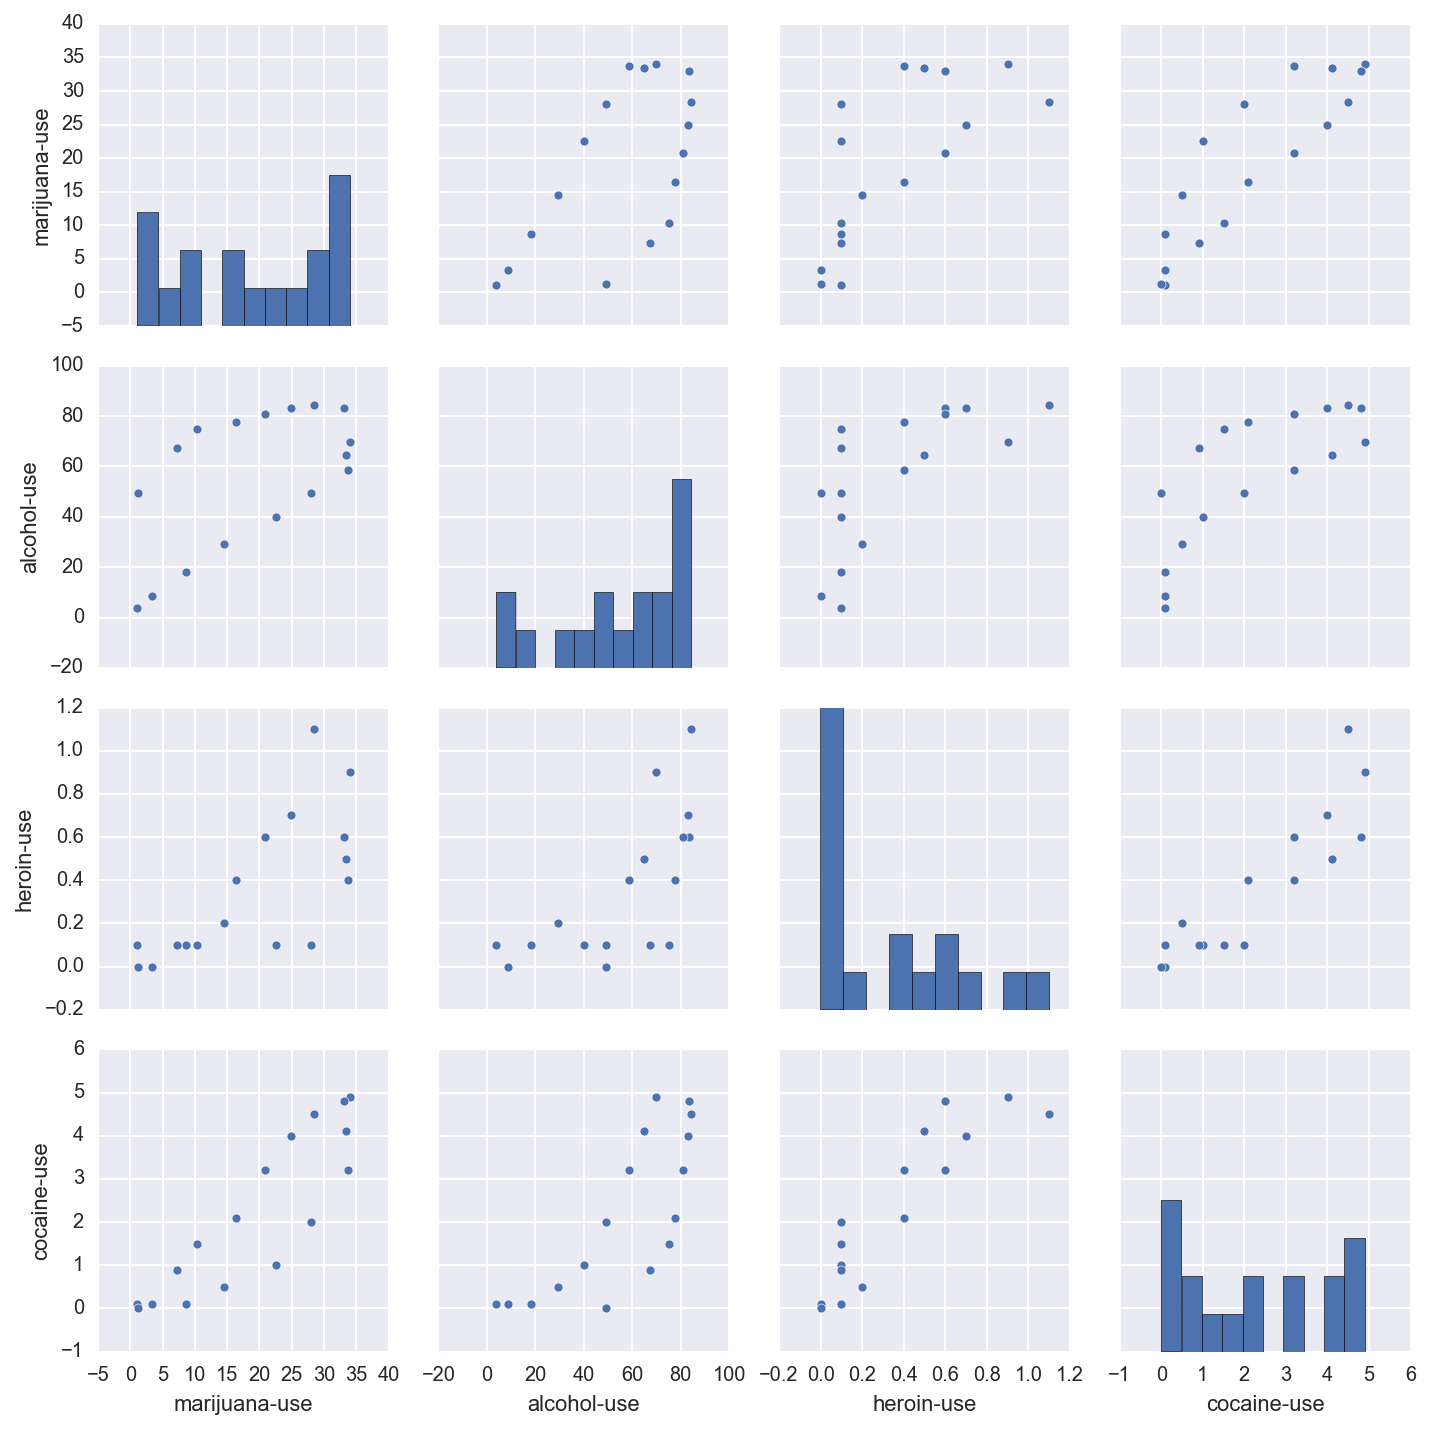

In [622]:
sns.pairplot(drug[['marijuana-use','alcohol-use','heroin-use','cocaine-use']])
# hm so far the data doesn't seem to support that hypothesis

In [623]:
drug_sum = drug[['marijuana-use','alcohol-use','heroin-use','cocaine-use']]
drug_sum['non-dangerous-drugs'] = drug['marijuana-use'] + drug['alcohol-use']
drug_sum['more-dangerous-drugs'] = drug['heroin-use'] + drug['cocaine-use']
drug_sum

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,marijuana-use,alcohol-use,heroin-use,cocaine-use,non-dangerous-drugs,more-dangerous-drugs
0,1.1,3.9,0.1,0.1,5.0,0.2
1,3.4,8.5,0.0,0.1,11.9,0.1
2,8.7,18.1,0.1,0.1,26.8,0.2
3,14.5,29.2,0.2,0.5,43.7,0.7
4,22.5,40.1,0.1,1.0,62.6,1.1
5,28.0,49.3,0.1,2.0,77.3,2.1
6,33.7,58.7,0.4,3.2,92.4,3.6
7,33.4,64.6,0.5,4.1,98.0,4.6
8,34.0,69.7,0.9,4.9,103.7,5.8
9,33.0,83.2,0.6,4.8,116.2,5.4


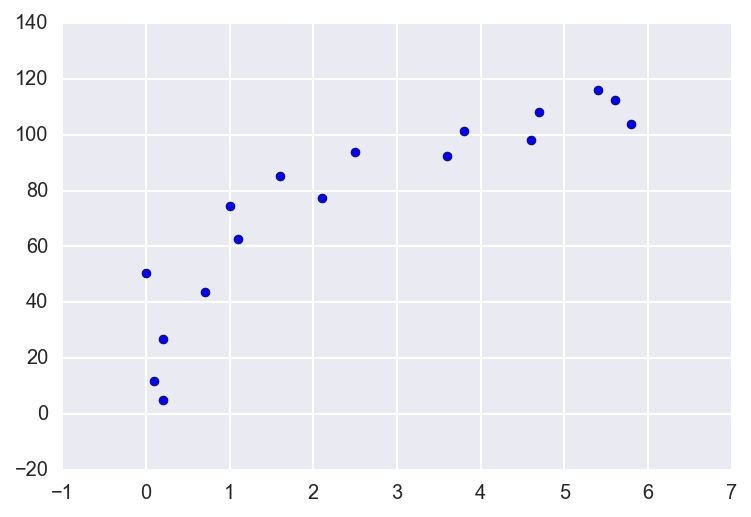

In [624]:
fig = plt.figure()
ax = fig.gca()
ax = ax.scatter(drug_sum['more-dangerous-drugs'],drug_sum['non-dangerous-drugs'])

# whelp, not negative AT ALL.

In [625]:
drug_sum.corr()

,marijuana-use,alcohol-use,heroin-use,cocaine-use,non-dangerous-drugs,more-dangerous-drugs
marijuana-use,1.000000,0.594165,0.711613,0.883789,0.790773,0.868537
alcohol-use,0.594165,1.000000,0.677614,0.773458,0.962196,0.768735
heroin-use,0.711613,0.677614,1.000000,0.899944,0.756627,0.927724
cocaine-use,0.883789,0.773458,0.899944,1.000000,0.887865,0.997646
non-dangerous-drugs,0.790773,0.962196,0.756627,0.887865,1.000000,0.879107
more-dangerous-drugs,0.868537,0.768735,0.927724,0.997646,0.879107,1.000000


In [ ]:
# Report:
# Yes, so it seems that my hypothesis is, on the surface, not a great one.  It 
# appears that use of more dangerous drugs INCREASES as use of non dangerous 
# drugs increases.  I might want to do some further exploration to take
# the effect of age increase into effect - perhaps it's simply that the subject
# gets older, gets more money to buy and use drugs, becomes more sophisticated,
# and consumes more of both types of drugs, rather than one being a driver for 
# the other.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [613]:
####################
# this is a chall- #
# -enge            #
####################

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [614]:
####################
# expert
####################

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

In [615]:
####################
# expert
####################

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [616]:
####################
# Challenge
####################

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [617]:
####################
# expert
####################

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.